In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

# 당뇨병 데이터 딥러닝 분류

In [196]:
# Load the dataset
file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week5/dataFrame/diabetes.csv'

In [197]:
df = pd.read_csv(file_path)
# Display the first few rows of the dataset 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [198]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [199]:
# Check the data types of the columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [200]:
# Check the shape of the dataset
df.shape

(768, 9)

In [201]:
# Check the distribution of the target variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

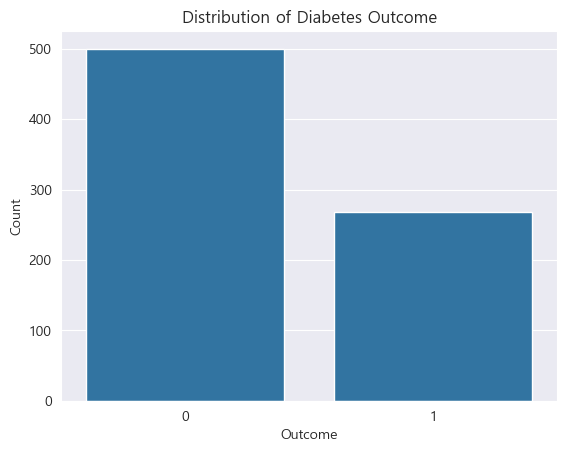

In [202]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

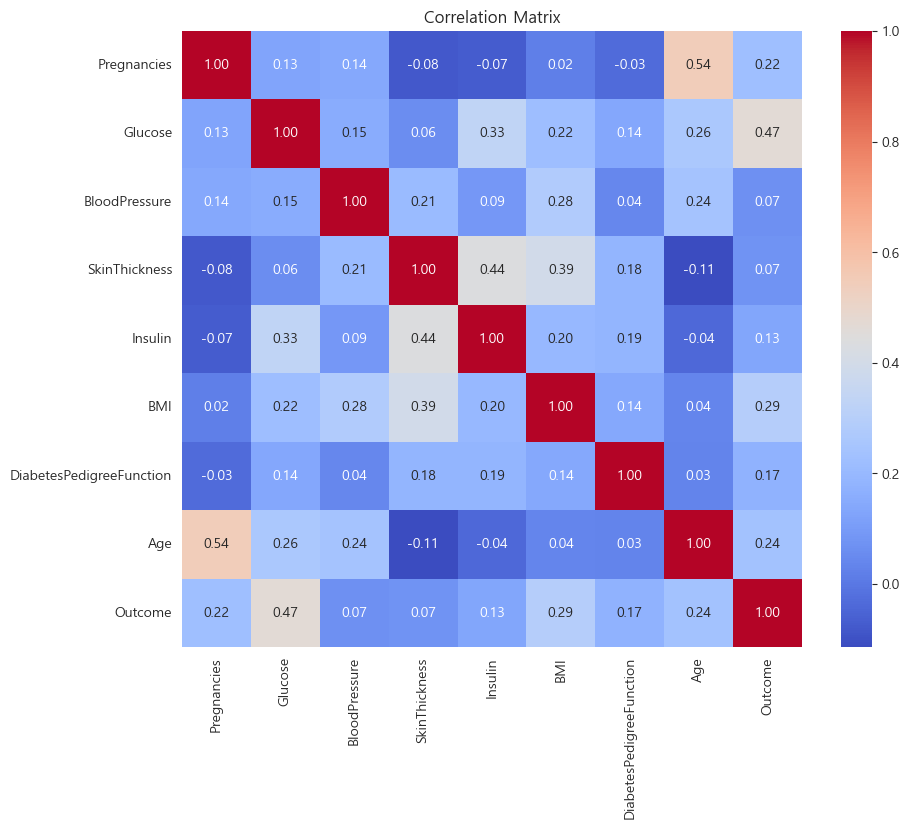

In [203]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [204]:
df.duplicated().sum()

np.int64(0)

In [205]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [206]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

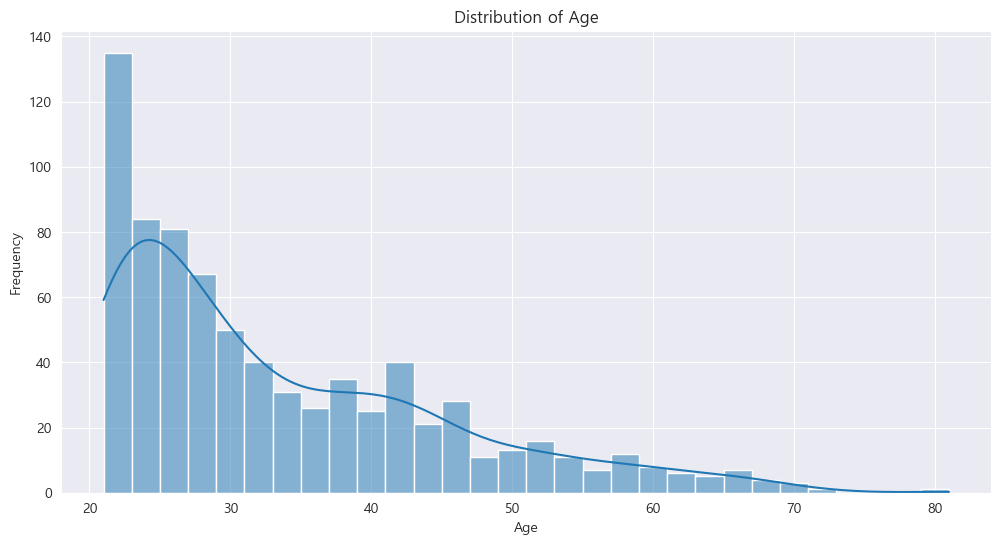

In [207]:
# Check the distribution of the 'Age' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

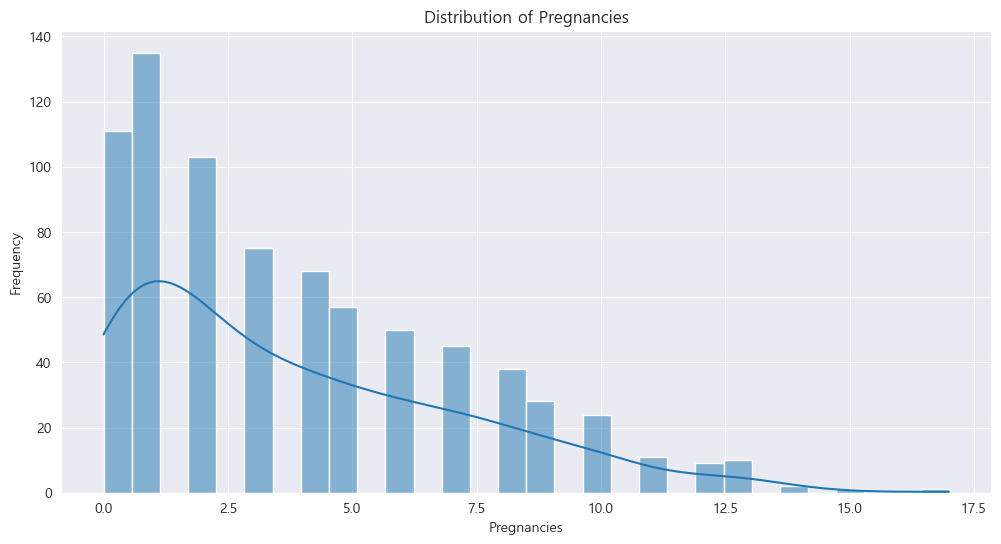

In [208]:
# Check the distribution of the 'Pregnancies' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Pregnancies'], bins=30, kde=True)
plt.title('Distribution of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

In [209]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = pd.get_dummies(y).values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 8), (154, 8), (614, 2), (154, 2))

In [211]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 이진 분류 이므로 sigmoid 사용 
])


In [212]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [213]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2627 - mse: 0.2627 - val_loss: 0.2556 - val_mse: 0.2556
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2548 - mse: 0.2548 - val_loss: 0.2524 - val_mse: 0.2524
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2525 - mse: 0.2525 - val_loss: 0.2518 - val_mse: 0.2518
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2521 - mse: 0.2521 - val_loss: 0.2515 - val_mse: 0.2515
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2515 - mse: 0.2515 - val_loss: 0.2513 - val_mse: 0.2513
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2513 - mse: 0.2513 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2510 - mse: 0.2510 - val_loss: 0.2510 - val_mse: 0.2510
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2509 - mse: 0.2509 - val_loss: 0.2509 - val_mse: 0.2509
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2508 - mse: 

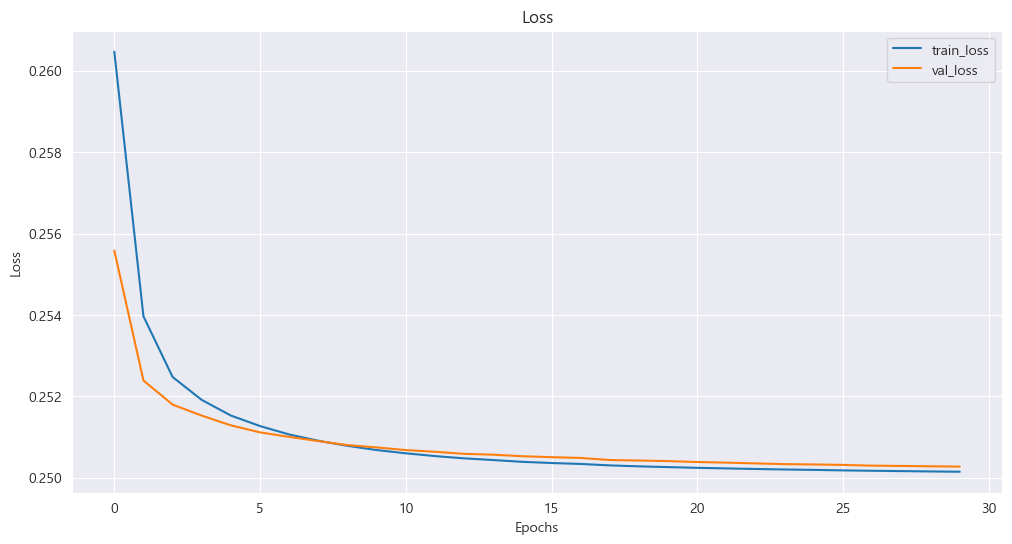

In [214]:
# loss check 
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

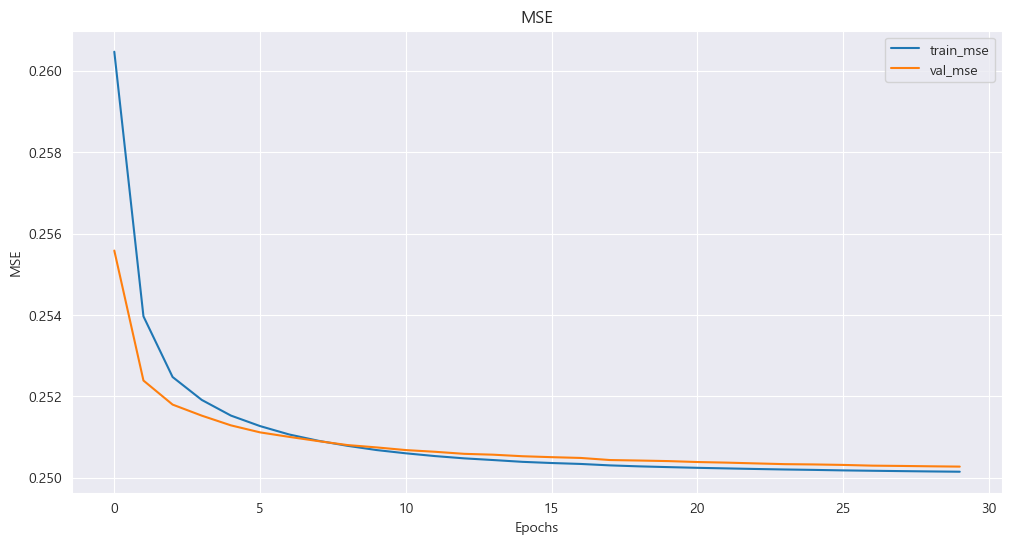

In [215]:
# mse check
plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.title('MSE')
plt.xlabel('Epochs') 
plt.ylabel('MSE')
plt.legend()
plt.show()

In [216]:
# Evaluate the model
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 - mse: 0.2502 


[0.2502717971801758, 0.2502717971801758]

In [217]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 - mse: 0.2502 
Loss: 0.2503, Accuracy: 0.2503


# 당뇨병 데이터  딥러닝 회귀

In [218]:
df = df.drop("Outcome", axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [219]:
df["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [220]:
X = df.drop('BMI', axis=1)
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [221]:
y = pd.get_dummies(y).values

In [222]:
X = X.values

In [223]:
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [224]:
X.shape

(768, 7)

In [225]:
y.shape

(768, 248)

In [226]:
reg_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [227]:
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [228]:
history = reg_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

loss, mae = reg_model.evaluate(X_test, y_test)

print(f"\n Test MAE: {mae:.4f}")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 962.1974 - mae: 23.6647 - val_loss: 347.3386 - val_mae: 13.6695
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 317.3766 - mae: 13.5932 - val_loss: 151.0988 - val_mae: 9.8185
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180.7975 - mae: 10.1546 - val_loss: 101.2951 - val_mae: 8.2128
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.9581 - mae: 8.5387 - val_loss: 86.7030 - val_mae: 7.6412
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.9417 - mae: 7.6612 - val_loss: 80.3188 - val_mae: 7.3745
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.8028 - mae: 7.5477 - val_loss: 77.4778 - val_mae: 7.2035
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.3810 - mae: 6.4570 - val_loss: 72.9051 - val_mae: 6.9290
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.3352 - mae: 6.2496 - val_loss: 64.5832 - val_mae: 6.4213
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━

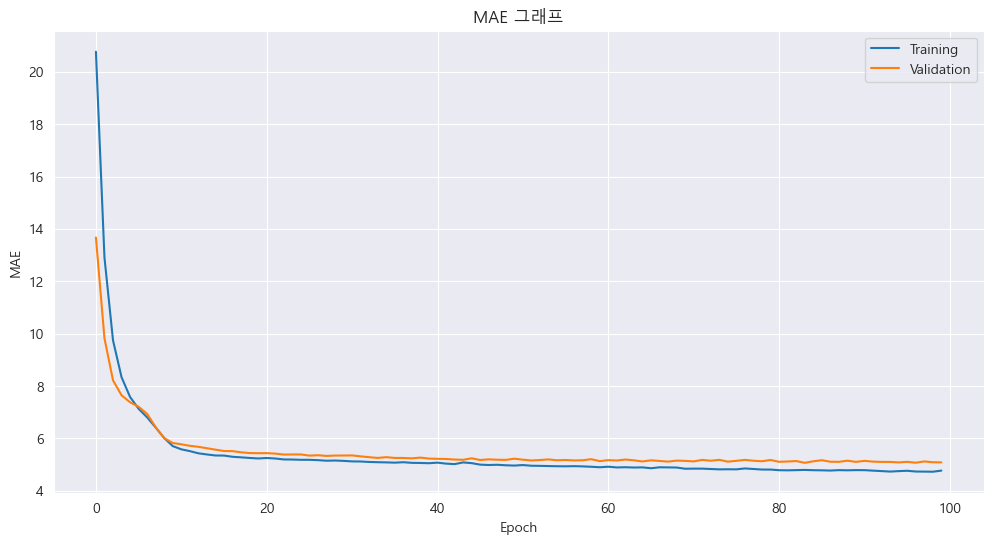

In [229]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 설정
# 그래프 기림
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title("MAE 그래프")
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [230]:
reg_model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 60.9346 - mae: 5.2027


[68.45218658447266, 5.342918872833252]